# CIBMTR - Equity in post-HCT Survival Predictions

## Getting the datas

In [1]:
# !kaggle competitions download -c equity-post-HCT-survival-predictions && mkdir data && tar -xvzf equity-post-HCT-survival-predictions.zip --directory data && del -f equity-post-HCT-survival-predictions.zip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/train.csv')
df.head(5)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [5]:
X_df, y = df.drop(columns=['efs', 'efs_time']).set_index('ID'), df['efs']

In [6]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28800 entries, 0 to 28799
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dri_score               28646 non-null  object 
 1   psych_disturb           26738 non-null  object 
 2   cyto_score              20732 non-null  object 
 3   diabetes                26681 non-null  object 
 4   hla_match_c_high        24180 non-null  float64
 5   hla_high_res_8          22971 non-null  float64
 6   tbi_status              28800 non-null  object 
 7   arrhythmia              26598 non-null  object 
 8   hla_low_res_6           25530 non-null  float64
 9   graft_type              28800 non-null  object 
 10  vent_hist               28541 non-null  object 
 11  renal_issue             26885 non-null  object 
 12  pulm_severe             26665 non-null  object 
 13  prim_disease_hct        28800 non-null  object 
 14  hla_high_res_6          23516 non-null  flo

In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28800 entries, 0 to 28799
Series name: efs
Non-Null Count  Dtype  
--------------  -----  
28800 non-null  float64
dtypes: float64(1)
memory usage: 225.1 KB


## Understanding the data

In [8]:
X_df.head(5)

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0


### 1. Let's take a look at numerical features

In [9]:
X_df_num = X_df.select_dtypes(include=[np.number])
X_df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28800 entries, 0 to 28799
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hla_match_c_high     24180 non-null  float64
 1   hla_high_res_8       22971 non-null  float64
 2   hla_low_res_6        25530 non-null  float64
 3   hla_high_res_6       23516 non-null  float64
 4   hla_high_res_10      21637 non-null  float64
 5   hla_match_dqb1_high  23601 non-null  float64
 6   hla_nmdp_6           24603 non-null  float64
 7   hla_match_c_low      26000 non-null  float64
 8   hla_match_drb1_low   26157 non-null  float64
 9   hla_match_dqb1_low   24606 non-null  float64
 10  year_hct             28800 non-null  int64  
 11  hla_match_a_high     24499 non-null  float64
 12  donor_age            26992 non-null  float64
 13  hla_match_b_low      26235 non-null  float64
 14  age_at_hct           28800 non-null  float64
 15  hla_match_a_low      26410 non-null  floa

<Axes: >

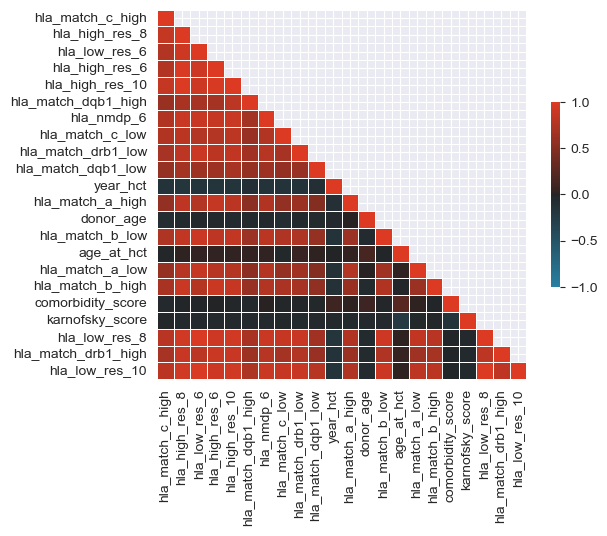

In [10]:
corr = X_df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
cmap = sns.diverging_palette(230, 15, 90, center='dark', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We observe that some features are quite correlated. To avoid redundant information, using PCA might be pertinent.

<Axes: >

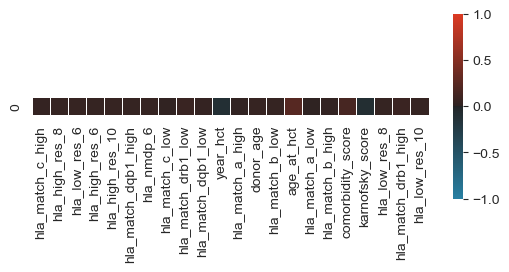

In [29]:
corr_y = X_df_num.corrwith(y)
sns.heatmap(pd.DataFrame(corr_y).T, cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
pd.DataFrame(corr_y).describe()

,0
count,22.000000
mean,0.040534
std,0.065228
min,-0.106419
25%,0.027682
50%,0.040788
75%,0.047426
max,0.227866


In [41]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

In [44]:
tmp_x_num = KNNImputer(missing_values=np.nan).fit_transform(X_df_num)

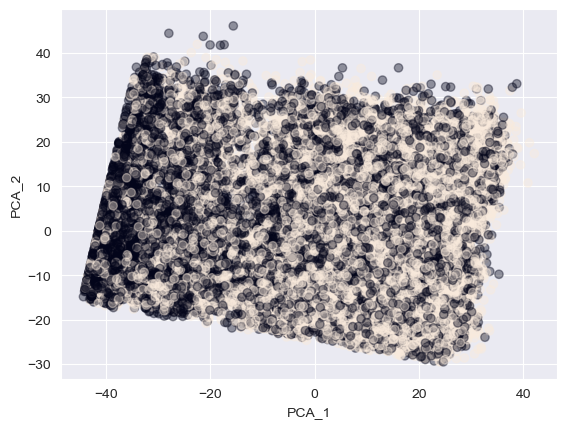

In [48]:
X_2dim = PCA(n_components=2).fit_transform(tmp_x_num)
plt.scatter(X_2dim[:, 0], X_2dim[:, 1], c=y, alpha=.4)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

After performing a PCA on the numerical features and try to plot them all in 2D, we can see that numerical features alone might not be enough to have the most accurate model.

### 2. Let's try again but with the categorical features.

In [49]:
X_df_cat = X_df.select_dtypes(exclude=[np.number])
X_df_cat.head(5)

,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,...,gvhd_proph,rheum_issue,sex_match,race_group,hepatic_mild,tce_div_match,donor_related,melphalan_dose,cardiac,pulm_moderate
ID,,,,,,,,,,,,,,,,,,,,,
0,N/A - non-malignant indication,No,NaN,No,No TBI,No,Bone marrow,No,No,No,...,FKalone,No,M-F,More than one race,No,NaN,Unrelated,"N/A, Mel not given",No,No
1,Intermediate,No,Intermediate,No,"TBI +- Other, >cGy",No,Peripheral blood,No,No,No,...,Other GVHD Prophylaxis,No,F-F,Asian,No,Permissive mismatched,Related,"N/A, Mel not given",No,Yes
2,N/A - non-malignant indication,No,NaN,No,No TBI,No,Bone marrow,No,No,No,...,Cyclophosphamide alone,No,F-M,More than one race,No,Permissive mismatched,Related,"N/A, Mel not given",No,No
3,High,No,Intermediate,No,No TBI,No,Bone marrow,No,No,No,...,FK+ MMF +- others,No,M-M,White,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",No,No
4,High,No,NaN,No,No TBI,No,Peripheral blood,No,No,No,...,TDEPLETION +- other,No,M-F,American Indian or Alaska Native,No,Permissive mismatched,Related,MEL,No,No


In [53]:
data_info_df = pd.read_csv('data/data_dictionary.csv').set_index('variable')
data_info_df.loc[X_df_cat.columns.values,'values']

variable
dri_score                 ['Intermediate' 'High' 'N/A - non-malignant in...
psych_disturb                                   ['Yes' 'No' nan 'Not done']
cyto_score                ['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
diabetes                                        ['No' 'Yes' nan 'Not done']
tbi_status                ['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <...
arrhythmia                                      ['No' nan 'Yes' 'Not done']
graft_type                               ['Peripheral blood' 'Bone marrow']
vent_hist                                                  ['No' 'Yes' nan]
renal_issue                                     ['No' nan 'Yes' 'Not done']
pulm_severe                                     ['No' 'Yes' nan 'Not done']
prim_disease_hct          ['ALL' 'MPN' 'IPA' 'AML' 'MDS' 'Other acute le...
cmv_status                                    ['+/-' '+/+' '-/-' '-/+' nan]
tce_imm_match             ['P/P' nan 'G/G' 'H/H' 'G/B' 'H/B' 'P/H' 'P/G'...
rit

In [56]:
X_cat_n_unique = X_df_cat.apply(pd.Series.nunique)
X_cat_n_unique

dri_score                 11
psych_disturb              3
cyto_score                 7
diabetes                   3
tbi_status                 8
arrhythmia                 3
graft_type                 2
vent_hist                  2
renal_issue                3
pulm_severe                3
prim_disease_hct          18
cmv_status                 4
tce_imm_match              8
rituximab                  2
prod_type                  2
cyto_score_detail          5
conditioning_intensity     6
ethnicity                  3
obesity                    3
mrd_hct                    2
in_vivo_tcd                2
tce_match                  4
hepatic_severe             3
prior_tumor                3
peptic_ulcer               3
gvhd_proph                17
rheum_issue                3
sex_match                  4
race_group                 6
hepatic_mild               3
tce_div_match              4
donor_related              3
melphalan_dose             2
cardiac                    3
pulm_moderate 

In [57]:
df.shape

(28800, 60)

Having over 20 000 samples, we could assume we could have a maximum of 2 000 features (general rule of thumb). So using One-Hot-Encoding on the categorical datas should not be a problem.
Moreover, the binary ones ('yes' or 'no') will end up being only one column.